In [2]:
import wandb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.stats import ttest_rel


float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

_ = sns.set(style="darkgrid", palette="colorblind")

In [11]:
def get_last_avg_return(entity, project, experiments, window=500, frequency=20000):
    api = wandb.Api()
    runs = api.runs(entity + "/" + project)
    dfs = []
    for run in runs:
        _, experiment, seed, _ = run.name.split("__")
        if experiment in experiments:
            # print(experiment, seed)
            history = run.scan_history(keys=["charts/episodic_return", "global_step"])
            df_ = pd.DataFrame(history)
            df_train = df_[["charts/episodic_return", "global_step"]]
            df_train["Avg. Episodic Return"] = df_train["charts/episodic_return"].rolling(window, min_periods=1, center=True, closed="both").mean()
            df_train = df_train.drop(["charts/episodic_return"], axis=1)
            decimated = np.arange(0, 2990000 + 1, frequency).reshape(-1, 1)
            d = cdist(df_train["global_step"].to_numpy().reshape(-1, 1), decimated)
            idx = np.argmin(d, 0)
            df_train = df_train.loc[idx]
            df_train["Experiment"] = experiment
            df_train["Seed"] = seed
            df_train["Task"] = "Train"
            df_train["Global Step"] = frequency * round(df_train["global_step"] / frequency)
            dfs.append(df_train)
    return pd.concat(dfs, ignore_index=True)

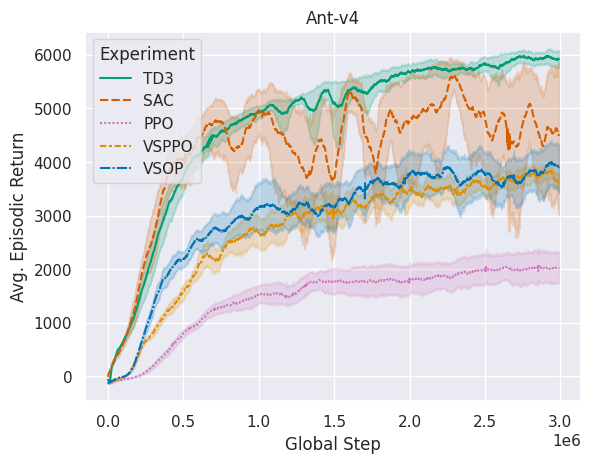

In [23]:
project = "Ant-v4"
mapping = {
    "VSOP": "vsop-4e2",
    "VSPPO": "ppo-9ul",
    "TD3": "td3-5yz",
    "SAC": "sac-m9v",
    "PPO": "ppo-977",
}
palette = {
    "VSOP": "C0",
    "VSPPO": "C1",
    "TD3": "C2",
    "SAC": "C3",
    "PPO": "C4",
}
df = get_last_avg_return(
    "a-jesson", 
    project, 
    [
        mapping["TD3"],
        mapping["SAC"],
        mapping["PPO"],
    ],
    window=100,
    frequency=1000,
)
df_1 = get_last_avg_return(
    "vsop", 
    project, 
    [
        mapping["VSOP"],
        mapping["VSPPO"],
    ],
    window=100,
    frequency=1000,
)
df = pd.concat([df, df_1], ignore_index=True)
for k, v in mapping.items():
    df.loc[df["Experiment"] == v, "Experiment"] = k
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    palette=palette,
    style="Experiment",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")

In [24]:
df = pd.concat([df, df_1], ignore_index=True)

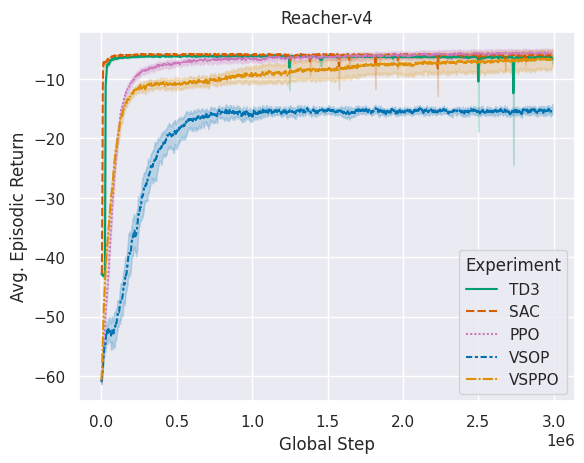

In [25]:
project = "Reacher-v4"
mapping = {
    "VSOP": "vsop-382",
    "VSPPO": "ppo-88m",
    "TD3": "td3-9z2",
    "SAC": "sac-832",
    "PPO": "ppo-2pj",
}
palette = {
    "VSOP": "C0",
    "VSPPO": "C1",
    "TD3": "C2",
    "SAC": "C3",
    "PPO": "C4",
}
df = get_last_avg_return(
    "a-jesson", 
    project, 
    [
        mapping["TD3"],
        mapping["SAC"],
        mapping["PPO"],
    ],
    window=100,
    frequency=1000,
)
df_1 = get_last_avg_return(
    "vsop", 
    project, 
    [
        mapping["VSOP"],
        mapping["VSPPO"],
    ],
    window=100,
    frequency=1000,
)
df = pd.concat([df, df_1], ignore_index=True)
for k, v in mapping.items():
    df.loc[df["Experiment"] == v, "Experiment"] = k
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    palette=palette,
    style="Experiment",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


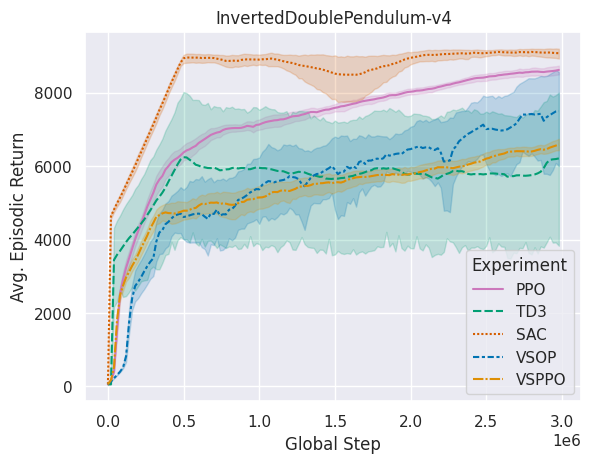

In [12]:
project = "InvertedDoublePendulum-v4"
mapping = {
    "VSOP": "vsop-9kl",
    "VSPPO": "ppo-29t",
    "TD3": "td3-3vy",
    "SAC": "sac-1xs",
    "PPO": "ppo-7r5",
}
palette = {
    "VSOP": "C0",
    "VSPPO": "C1",
    "TD3": "C2",
    "SAC": "C3",
    "PPO": "C4",
}
df = get_last_avg_return(
    "a-jesson", 
    project, 
    [
        mapping["TD3"],
        mapping["SAC"],
        mapping["PPO"],
    ],
    window=100,
    frequency=1000,
)
df_1 = get_last_avg_return(
    "vsop", 
    project, 
    [
        mapping["VSOP"],
        mapping["VSPPO"],
    ],
    window=100,
    frequency=1000,
)
df = pd.concat([df, df_1], ignore_index=True)
for k, v in mapping.items():
    df.loc[df["Experiment"] == v, "Experiment"] = k
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    palette=palette,
    style="Experiment",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")

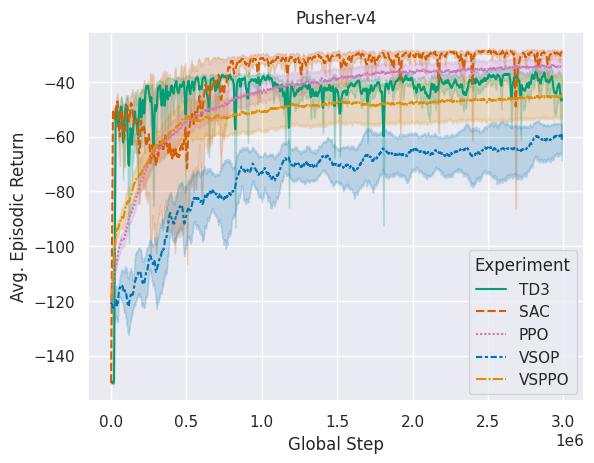

In [16]:
project = "Pusher-v4"
mapping = {
    "VSOP": "vsop-13w",
    "VSPPO": "ppo-6tk",
    "TD3": "td3-5nn",
    "SAC": "sac-26z",
    "PPO": "ppo-804",
}
palette = {
    "VSOP": "C0",
    "VSPPO": "C1",
    "TD3": "C2",
    "SAC": "C3",
    "PPO": "C4",
}
df = get_last_avg_return(
    "a-jesson", 
    project, 
    [
        mapping["TD3"],
        mapping["SAC"],
        mapping["PPO"],
    ],
    window=100,
    frequency=1000,
)
df_1 = get_last_avg_return(
    "vsop", 
    project, 
    [
        mapping["VSOP"],
        mapping["VSPPO"],
    ],
    window=100,
    frequency=1000,
)
df = pd.concat([df, df_1], ignore_index=True)
for k, v in mapping.items():
    df.loc[df["Experiment"] == v, "Experiment"] = k
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    palette=palette,
    style="Experiment",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")

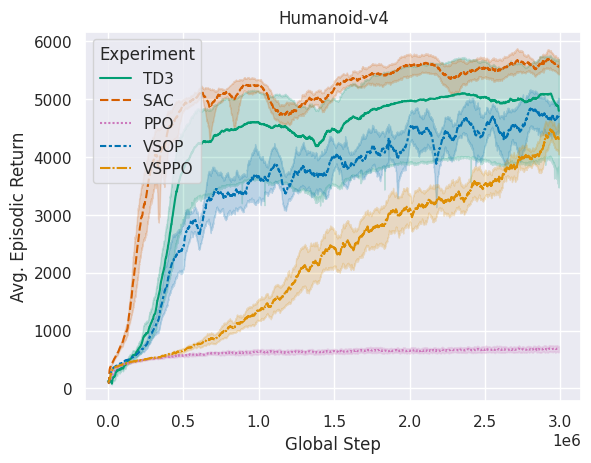

In [17]:
project = "Humanoid-v4"
mapping = {
    "VSOP": "vsop-190",
    "VSPPO": "ppo-zim",
    "TD3": "td3-1g0",
    "SAC": "sac-2bv",
    "PPO": "ppo-2jo",
}
palette = {
    "VSOP": "C0",
    "VSPPO": "C1",
    "TD3": "C2",
    "SAC": "C3",
    "PPO": "C4",
}
df = get_last_avg_return(
    "a-jesson", 
    project, 
    [
        mapping["TD3"],
        mapping["SAC"],
        mapping["PPO"],
    ],
    window=100,
    frequency=1000,
)
df_1 = get_last_avg_return(
    "vsop", 
    project, 
    [
        mapping["VSOP"],
        mapping["VSPPO"],
    ],
    window=100,
    frequency=1000,
)
df = pd.concat([df, df_1], ignore_index=True)
for k, v in mapping.items():
    df.loc[df["Experiment"] == v, "Experiment"] = k
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    palette=palette,
    style="Experiment",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")

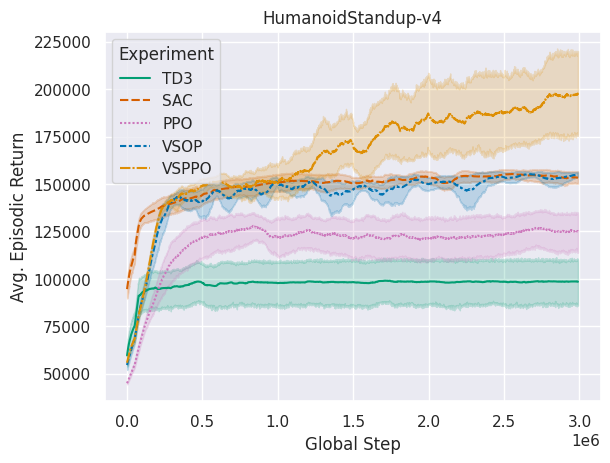

In [18]:
entity = "a-jesson"
project = "HumanoidStandup-v4"
mapping = {
    "VSOP": "vsop-5c1",
    "VSPPO": "ppo-5cs",
    "TD3": "td3-79p",
    "SAC": "sac-9hu",
    "PPO": "ppo-3ox",
}
palette = {
    "VSOP": "C0",
    "VSPPO": "C1",
    "TD3": "C2",
    "SAC": "C3",
    "PPO": "C4",
}
df = get_last_avg_return(
    "a-jesson", 
    project, 
    [
        mapping["TD3"],
        mapping["SAC"],
        mapping["PPO"],
    ],
    window=100,
    frequency=1000,
)
df_1 = get_last_avg_return(
    "vsop", 
    project, 
    [
        mapping["VSOP"],
        mapping["VSPPO"],
    ],
    window=100,
    frequency=1000,
)
df = pd.concat([df, df_1], ignore_index=True)
for k, v in mapping.items():
    df.loc[df["Experiment"] == v, "Experiment"] = k
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    palette=palette,
    style="Experiment",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")

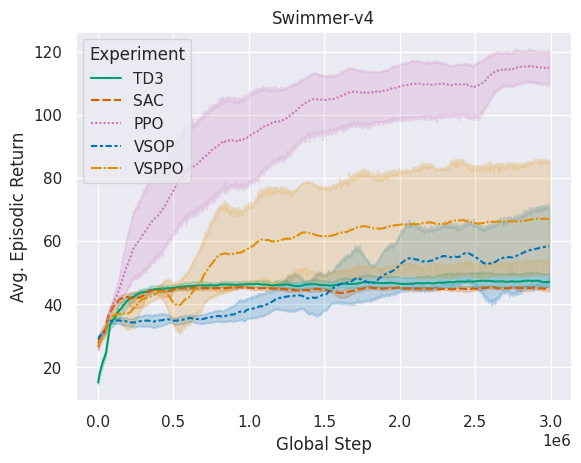

In [19]:
entity = "a-jesson"
project = "Swimmer-v4"
mapping = {
    "VSOP": "vsop-1om",
    "VSPPO": "ppo-mly",
    "TD3": "td3-2oo",
    "SAC": "sac-1mt",
    "PPO": "ppo-6p6",
}
palette = {
    "VSOP": "C0",
    "VSPPO": "C1",
    "TD3": "C2",
    "SAC": "C3",
    "PPO": "C4",
}
df = get_last_avg_return(
    "a-jesson", 
    project, 
    [
        mapping["TD3"],
        mapping["SAC"],
        mapping["PPO"],
    ],
    window=100,
    frequency=1000,
)
df_1 = get_last_avg_return(
    "vsop", 
    project, 
    [
        mapping["VSOP"],
        mapping["VSPPO"],
    ],
    window=100,
    frequency=1000,
)
df = pd.concat([df, df_1], ignore_index=True)
for k, v in mapping.items():
    df.loc[df["Experiment"] == v, "Experiment"] = k
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    palette=palette,
    style="Experiment",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integ

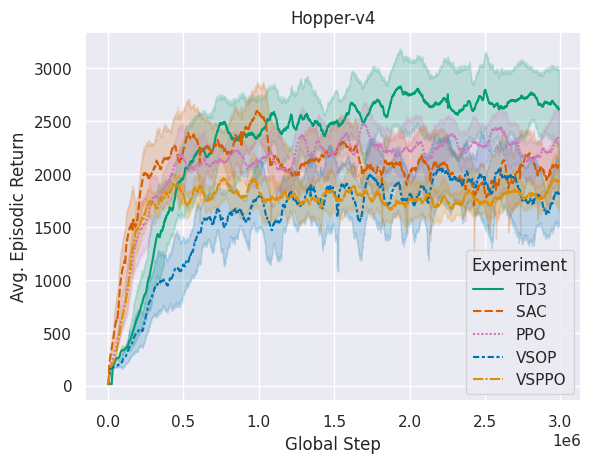

In [20]:
entity = "a-jesson"
project = "Hopper-v4"
mapping = {
    "VSOP": "vsop-7dy",
    "VSPPO": "ppo-7qu",
    "TD3": "td3-7jz",
    "SAC": "sac-39a",
    "PPO": "ppo-624",
}
palette = {
    "VSOP": "C0",
    "VSPPO": "C1",
    "TD3": "C2",
    "SAC": "C3",
    "PPO": "C4",
}
df = get_last_avg_return(
    "a-jesson", 
    project, 
    [
        mapping["TD3"],
        mapping["SAC"],
        mapping["PPO"],
    ],
    window=100,
    frequency=1000,
)
df_1 = get_last_avg_return(
    "vsop", 
    project, 
    [
        mapping["VSOP"],
        mapping["VSPPO"],
    ],
    window=100,
    frequency=1000,
)
df = pd.concat([df, df_1], ignore_index=True)
for k, v in mapping.items():
    df.loc[df["Experiment"] == v, "Experiment"] = k
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    palette=palette,
    style="Experiment",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")

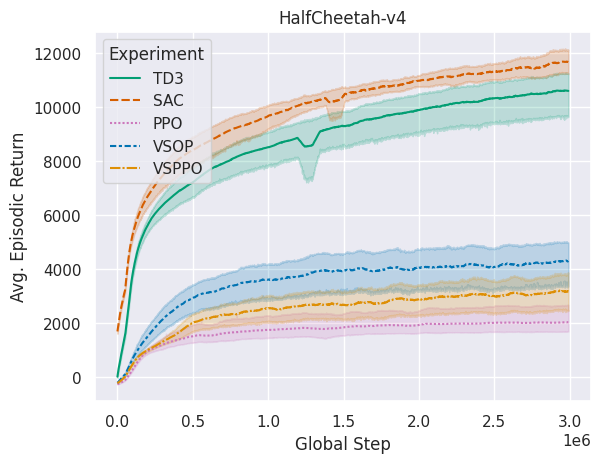

In [21]:
entity = "a-jesson"
project = "HalfCheetah-v4"
mapping = {
    "VSOP": "vsop-1ta",
    "VSPPO": "ppo-57t",
    "TD3": "td3-2k7",
    "SAC": "sac-qmw",
    "PPO": "ppo-f9y",
}
palette = {
    "VSOP": "C0",
    "VSPPO": "C1",
    "TD3": "C2",
    "SAC": "C3",
    "PPO": "C4",
}
df = get_last_avg_return(
    "a-jesson", 
    project, 
    [
        mapping["TD3"],
        mapping["SAC"],
        mapping["PPO"],
    ],
    window=100,
    frequency=1000,
)
df_1 = get_last_avg_return(
    "vsop", 
    project, 
    [
        mapping["VSOP"],
        mapping["VSPPO"],
    ],
    window=100,
    frequency=1000,
)
df = pd.concat([df, df_1], ignore_index=True)
for k, v in mapping.items():
    df.loc[df["Experiment"] == v, "Experiment"] = k
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    palette=palette,
    style="Experiment",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


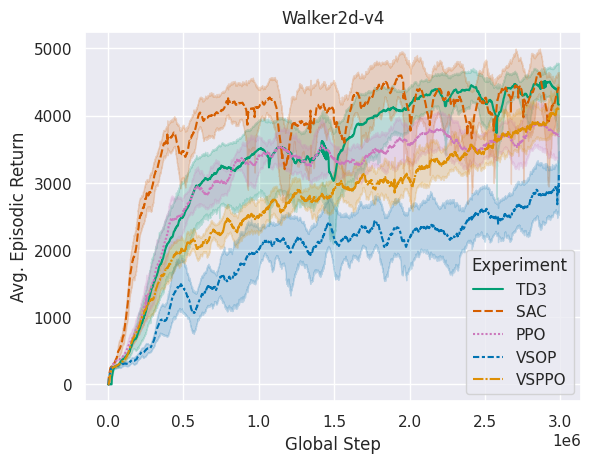

In [22]:
entity = "a-jesson"
project = "Walker2d-v4"
mapping = {
    "VSOP": "vsop-32r",
    "VSPPO": "ppo-4dp",
    "TD3": "td3-6ev",
    "SAC": "sac-wdj",
    "PPO": "ppo-5kc",
}
palette = {
    "VSOP": "C0",
    "VSPPO": "C1",
    "TD3": "C2",
    "SAC": "C3",
    "PPO": "C4",
}
df = get_last_avg_return(
    "a-jesson", 
    project, 
    [
        mapping["TD3"],
        mapping["SAC"],
        mapping["PPO"],
    ],
    window=100,
    frequency=1000,
)
df_1 = get_last_avg_return(
    "vsop", 
    project, 
    [
        mapping["VSOP"],
        mapping["VSPPO"],
    ],
    window=100,
    frequency=1000,
)
df = pd.concat([df, df_1], ignore_index=True)
for k, v in mapping.items():
    df.loc[df["Experiment"] == v, "Experiment"] = k
_ = sns.lineplot(
    df, 
    x="Global Step", 
    y="Avg. Episodic Return", 
    hue="Experiment", 
    palette=palette,
    style="Experiment",
    dashes=True,
    errorbar=('ci', 95),
)
_ = plt.title(f"{project}")